##### <p> Samuel Wolfe <br> June 16th, 2023 <br> MSBA 206 <br> DMBA Case 21.4 </p>

In [81]:
#setting up core functions
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

def readFile(fileLocation):
    df = pd.read_csv(fileLocation)
    return df
def normalize(df):
    dfNorm = (df - df.mean(numeric_only=True)) / df.std(numeric_only=True)
    dfNorm = dfNorm.dropna(axis=1)
    return dfNorm
def correlate(df):
    dfCorr = df.corr(numeric_only=True)
    return dfCorr


##### 21.4
21.4.1. Setting up a series of groups, filters, and counts, we find that for those who received the flyer there was an increase in<br>
        5.8%  to the target variable of MOVED_AD = 1. This indicates the flyer does have an impact on this dataset.<br>
21.4.2. Looking at the data and applying a few categories to some graphs, I believe the following at the predictors with good potential to increase the value of the flyer.<br>
        'HH_ND', 'NH_AA', 'NH_ASIAN', 'COMM_PT', 'COMM_WALK', 'GENDER_F', 'VG_12', 'PR_PELIG', 'G_PELIG', 'E_PELIG'. <br>
        What this tells me that households with at least one Democrat, African American or Asian, who use public transport or walk,<br>
        are female, voted in the general election of 2012, voted in a majority of the primary presidential elections,<br>
        general elections, or any election they were able to will have the strongest chances of being moved to vote for the candidate. <br>
        Given that I saw the outcome of these elections, I can safely say these predictors are accurate because the candidate that was <br>
        able to win over these minority groups was able to gather enough forward momentum to have a much better chance at winning.<br>
        Interestingly though overall sending out the flyers seemed to only impact Undecideds. But the Survey in general improved relations from Democratically aligned voters.<br>
        This tells me two additional pieces of information, the actual number of flyers distributed in a given area can be significantly lower if they exclude <br>
        registered Democrats for dispersal. But the impact of collecting survey data can compensate for this act, giving the "Flyer" budget allocations better focus. <br>
        




In [82]:
#1
dfVoters = readFile(r'E:\Aliit\School\MSBA\206\dmba-datasets\Voter-Persuasion.csv')
flyerYN = 'MESSAGE_A'
targetVar = 'MOVED_A'
#1 == Flyer, 0 == No Flyer
dfVotersFlyerY = dfVoters.loc[dfVoters[flyerYN] == 1]
dfVotersFlyerN = dfVoters.loc[dfVoters[flyerYN] == 0]
#Count of Voter Movement with Flyer
dfratioMovedFY = dfVotersFlyerY.groupby(targetVar)[targetVar].count().to_frame()
dfratioMovedFN = dfVotersFlyerN.groupby(targetVar)[targetVar].count().to_frame()
#Voter Movement as a percent
# Flyer == No == 34.44%
# Flyer == Yes == 40.24%
WavePercMovedFY = (dfratioMovedFY.at[1,targetVar]/len(dfVotersFlyerY.index)) * 100
WavePercMovedFN = (dfratioMovedFN.at[1,targetVar]/len(dfVotersFlyerN.index)) * 100


In [83]:
#2
#slim, normalize, correlate the data
dfVotersSlim = dfVoters.drop(columns=['VOTER_ID','SET_NO','opposite','MESSAGE_A_REV','CAND1S','CAND2S','I3','CAND1_UND','CAND2_UND','MOVED_AD','Partition','H_F1','VPP_08','VPR_08','VPR_12','PARTY_D'])
dfVotersNorm = normalize(dfVotersSlim)
#selecting best variables
dfVotersCorr = correlate(dfVotersNorm)
dfVotersCorrTarget = dfVotersCorr.loc['MOVED_A'].sort_values(ascending=False)
cutoff = 0.05
dfVotersCorrTargetReduced = dfVotersCorrTarget[dfVotersCorrTarget < cutoff]
listVotersTrim = dfVotersCorrTargetReduced.index.to_list()
dfVotersSlimTrim = dfVotersSlim.drop(columns=listVotersTrim)
dfVotersNormTrim = normalize(dfVotersSlimTrim)
#these are the columns with the highest value to predictions
xaxis = dfVotersNormTrim.columns.to_list()
print(xaxis)


['HH_ND', 'NH_AA', 'NH_ASIAN', 'COMM_PT', 'COMM_WALK', 'GENDER_F', 'VG_12', 'PR_PELIG', 'G_PELIG', 'E_PELIG', 'MESSAGE_A', 'MOVED_A']


<Axes: >

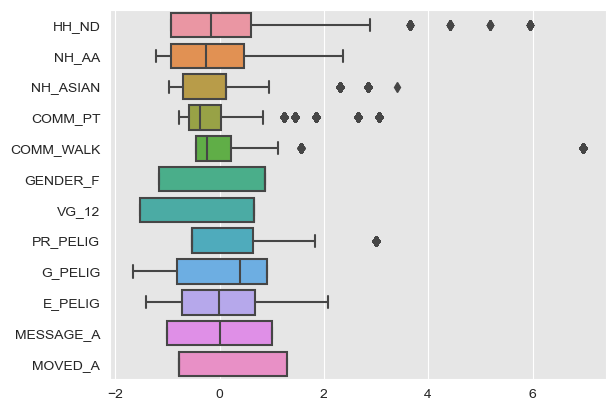

In [84]:
#Charts
#Boxplot of the top correlated values.
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.boxplot(
    data=dfVotersNormTrim,
    orient="h",
    )

<Axes: xlabel='HH_ND', ylabel='MOVED_A'>

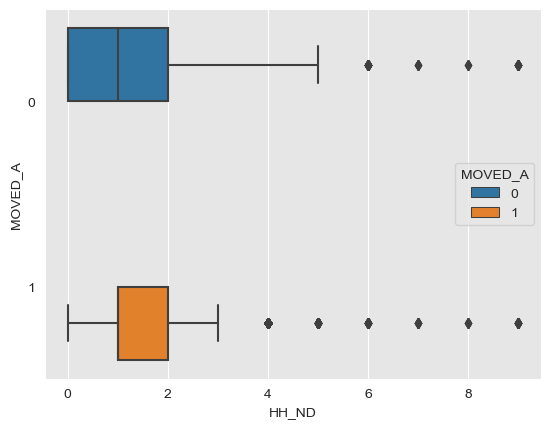

In [85]:
#Boxplot of Household Number of Democrats by MOVED_A
sns.boxplot(
    data=dfVoters,
    x = 'HH_ND',
    y = targetVar,
    orient="h",
    hue="MOVED_A"
    )

<Axes: xlabel='NH_AA', ylabel='MOVED_A'>

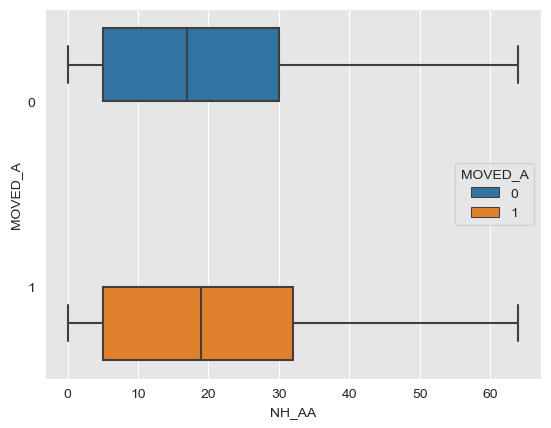

In [86]:
#Boxplot of Number of house hold african amaricans
sns.boxplot(
    data=dfVoters,
    x = 'NH_AA',
    y = targetVar,
    orient="h",
    hue="MOVED_A"
    )

<Axes: xlabel='AGE', ylabel='MOVED_A'>

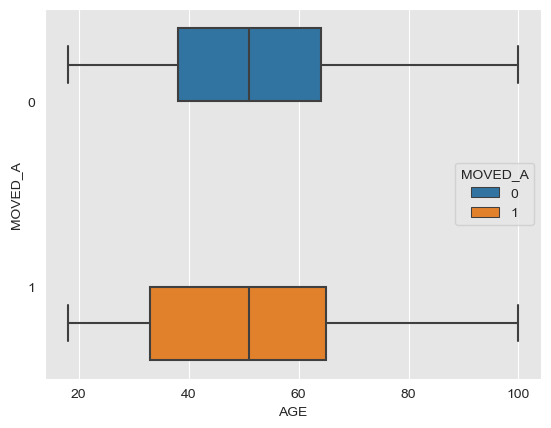

In [87]:
#Boxplot of AGE over MOVED_A
sns.boxplot(
    data=dfVoters,
    x = 'AGE',
    y = targetVar,
    orient="h",
    hue="MOVED_A"
    )

50.8697


<Axes: xlabel='AGE', ylabel='CAND1S'>

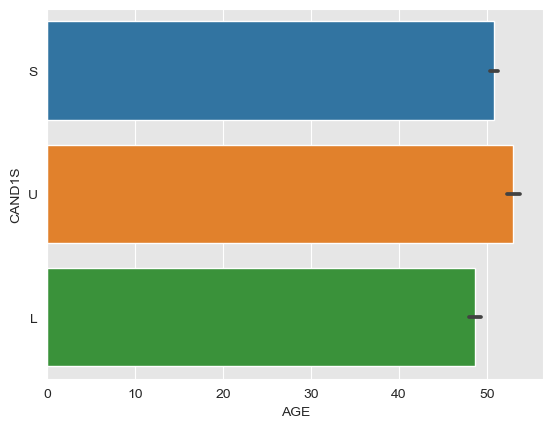

In [88]:
#Bar of AGE vs CAND
print(dfVoters['AGE'].mean())
sns.barplot(
    data=dfVoters,
    x='AGE',
    y='CAND1S'
)

50.8697


<Axes: xlabel='CAND1S', ylabel='AGE'>

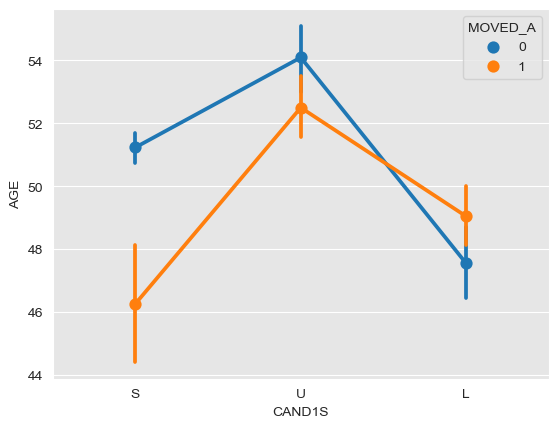

In [89]:
#PointPlot of AGE vs CAND
print(dfVoters['AGE'].mean())
sns.pointplot(
    data=dfVoters,
    y='AGE',
    x='CAND1S',
    hue=targetVar
)

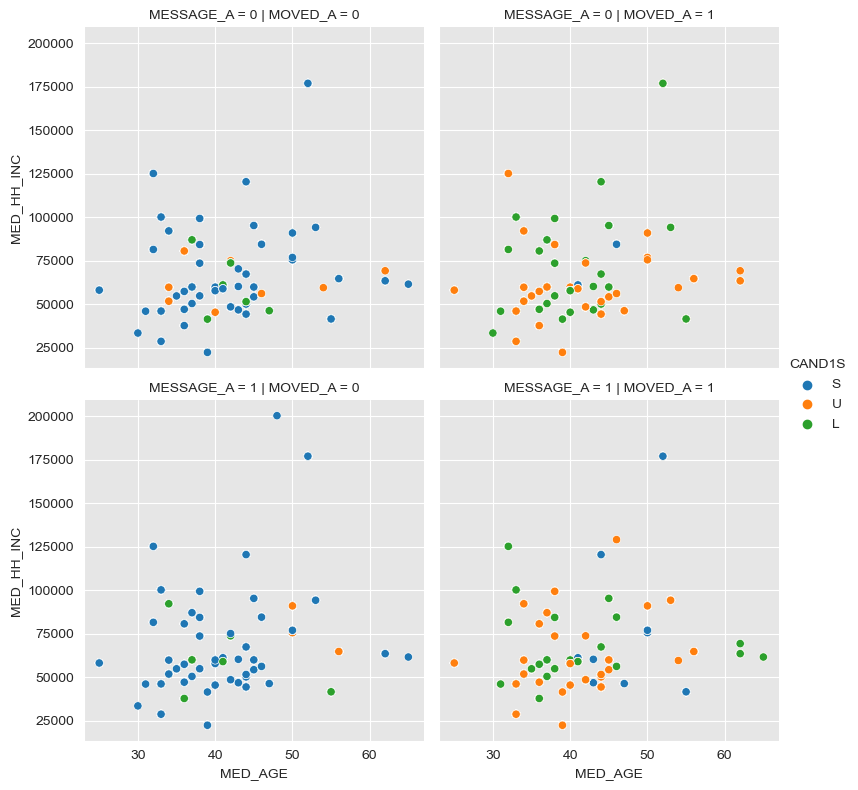

In [90]:
#lmplot
sns.relplot(
    data=dfVoters,
    x='MED_AGE',
    y='MED_HH_INC',
    hue='CAND1S',
    col=targetVar,
    row=flyerYN,
    height=4
)